<a href="https://www.kaggle.com/code/vishantmathur/house-price-prediction-linearregression?scriptVersionId=126894264" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

In [2]:
df = pd.read_csv("/kaggle/input/usa-housing-dataset/housing_train.csv",index_col ="Id")

In [3]:
df.shape

(1460, 80)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [7]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
new_df = df.iloc[:,:-1]
df_numerical = new_df.select_dtypes(exclude='object').columns
df_categorical = new_df.select_dtypes(include='object').columns

## EDA (Exploratory data analysis)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


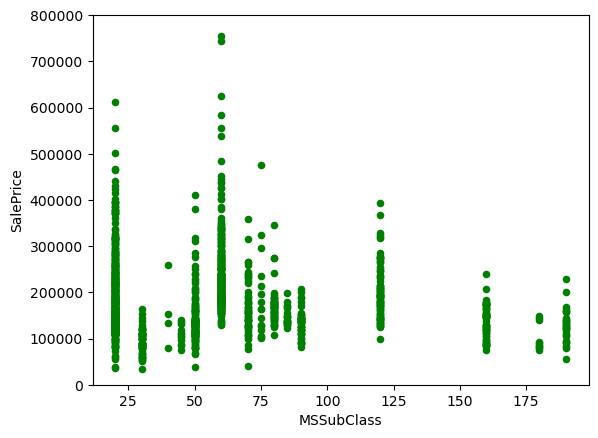

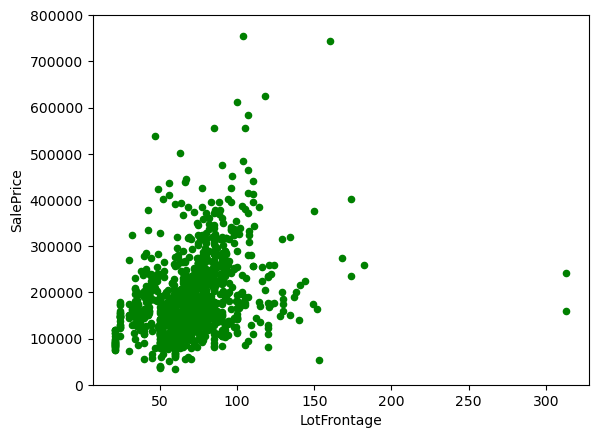

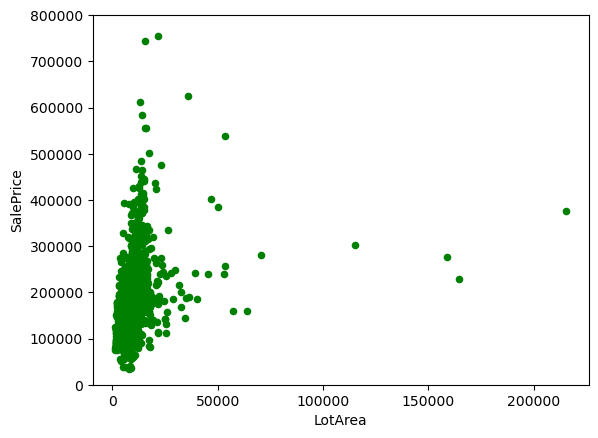

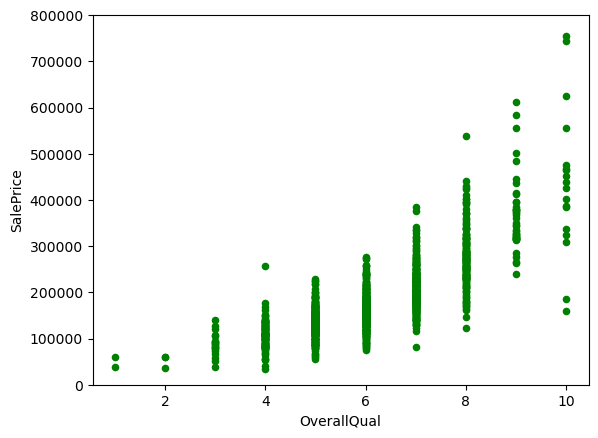

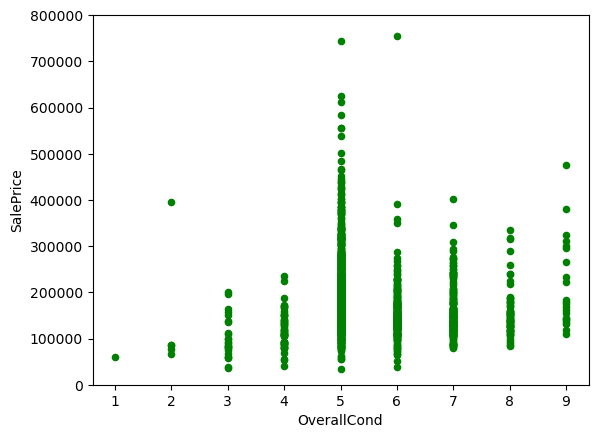

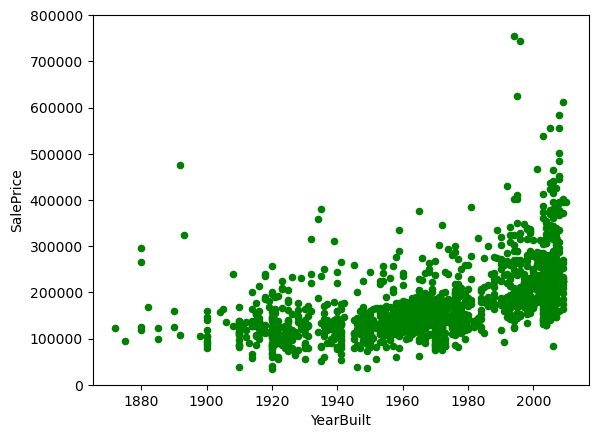

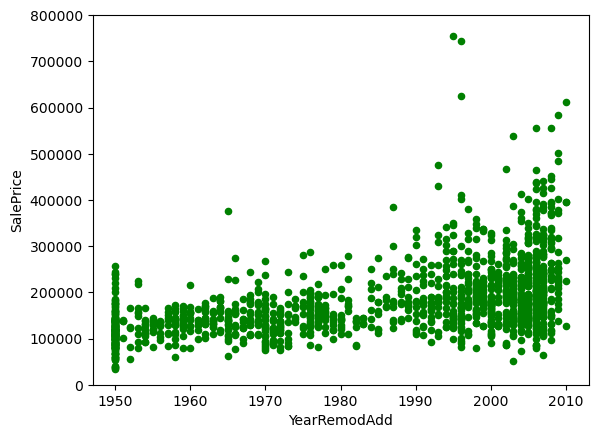

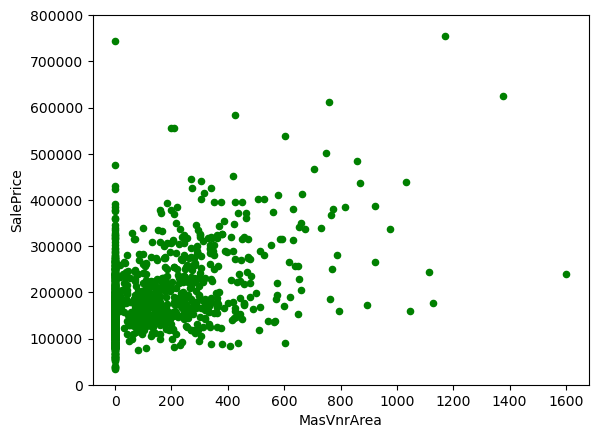

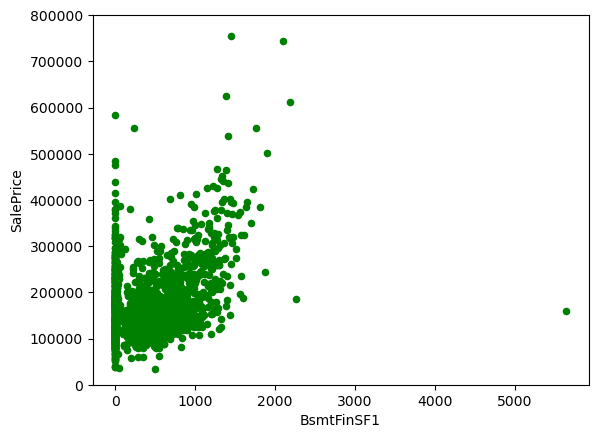

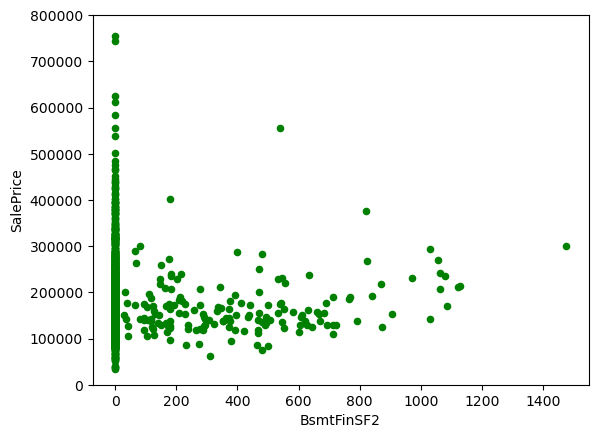

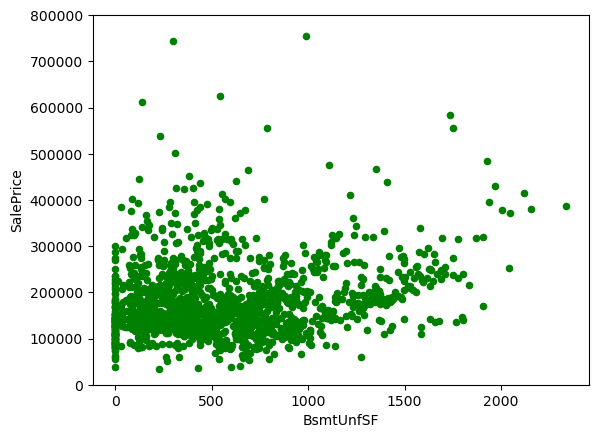

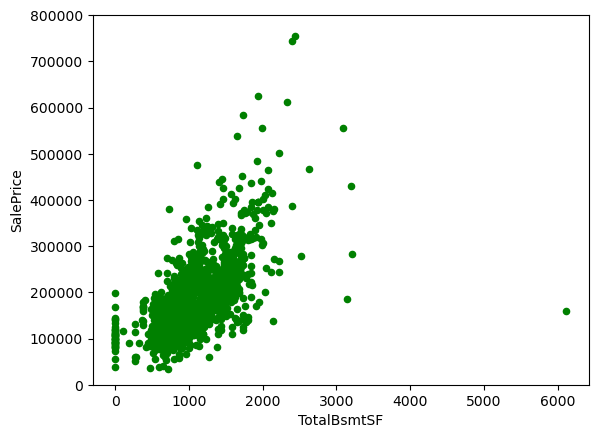

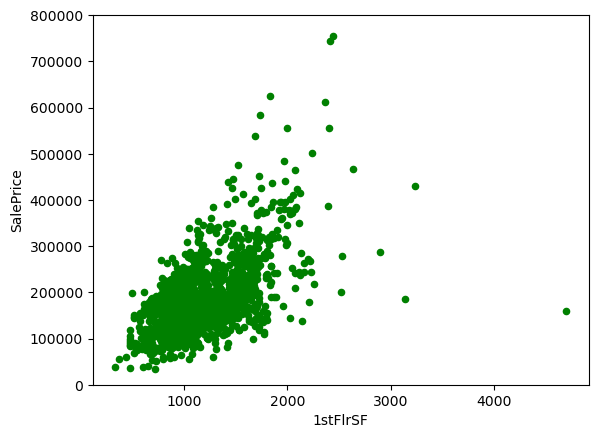

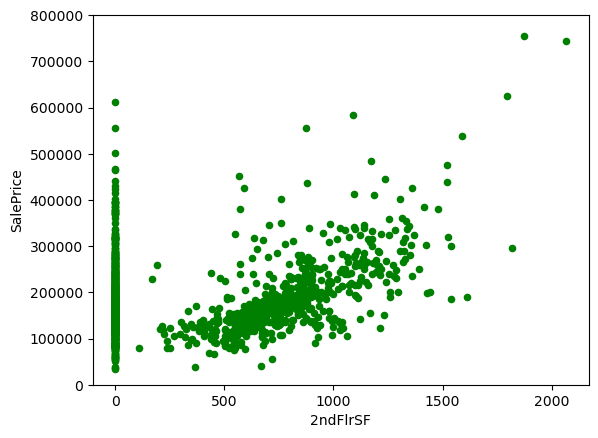

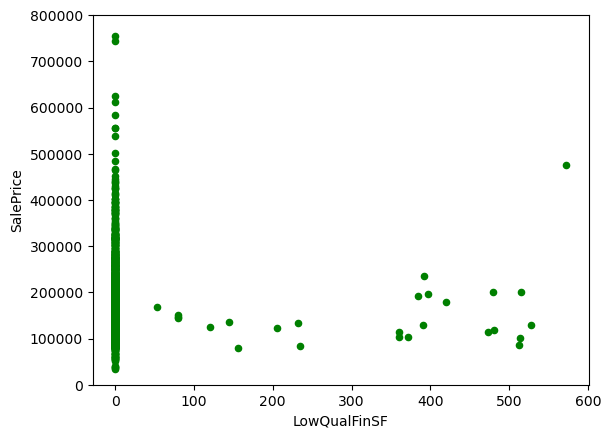

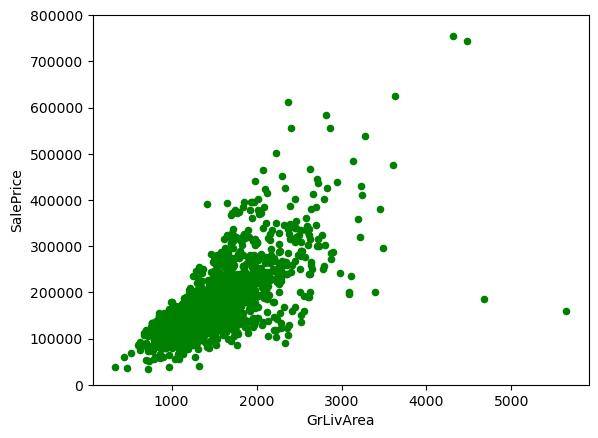

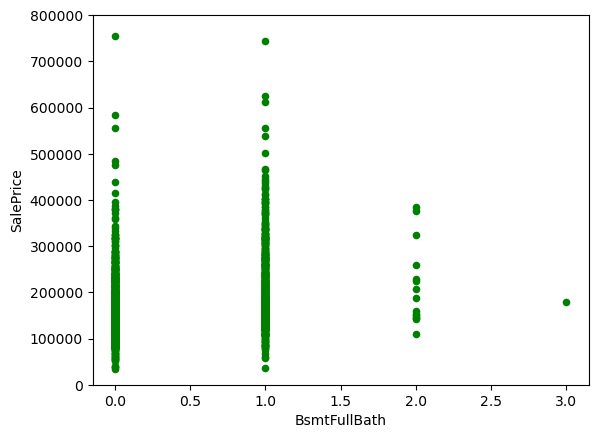

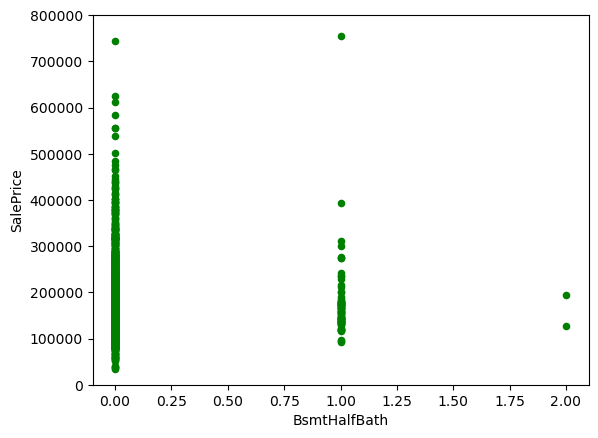

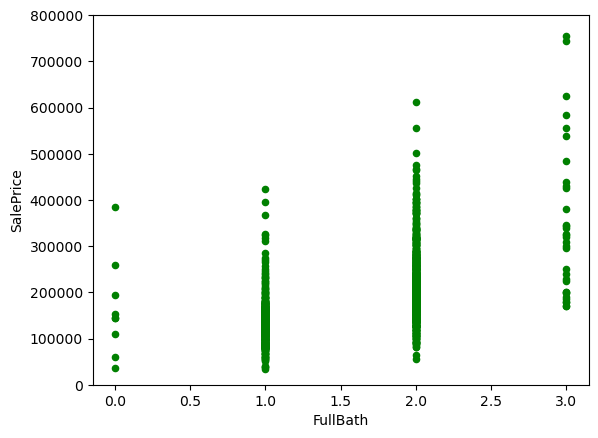

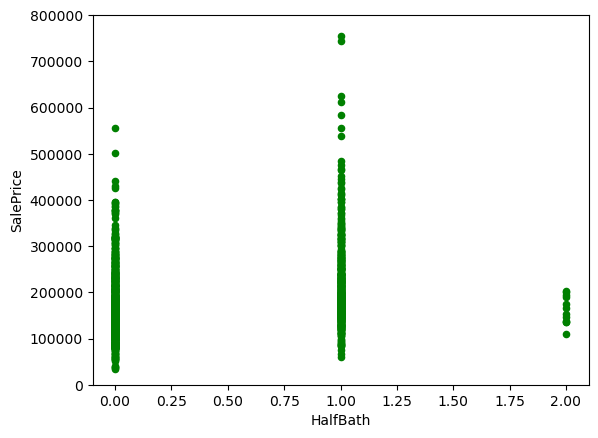

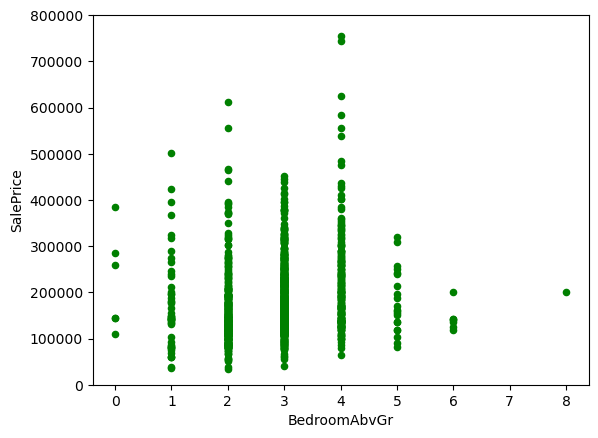

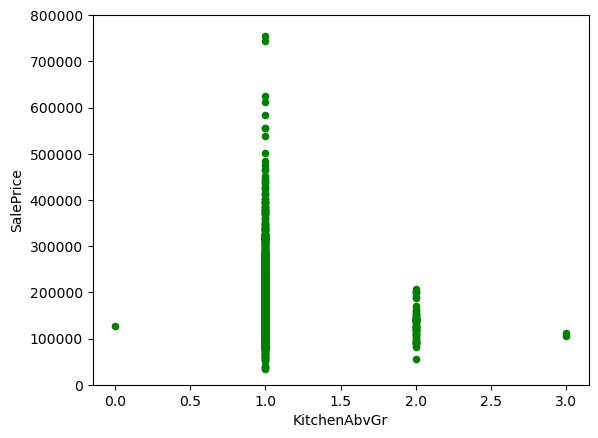

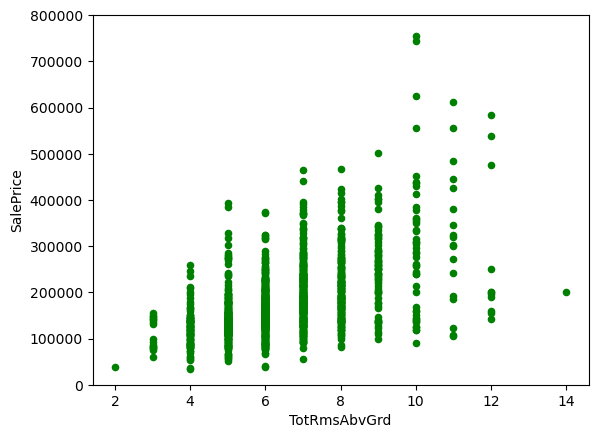

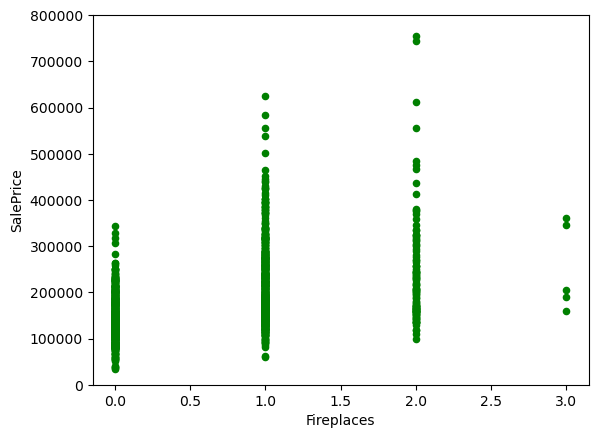

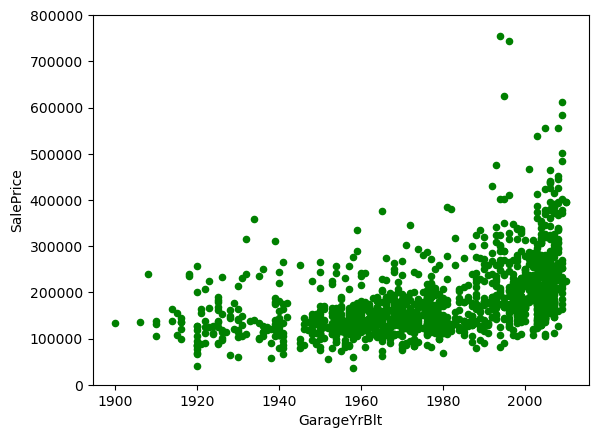

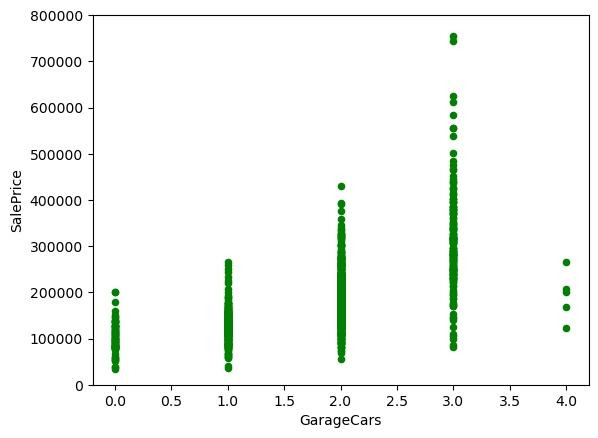

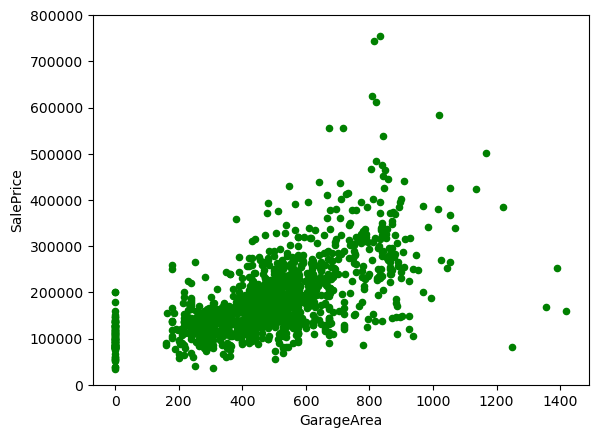

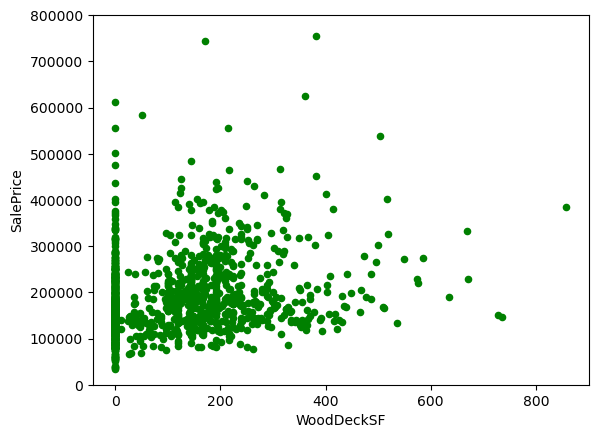

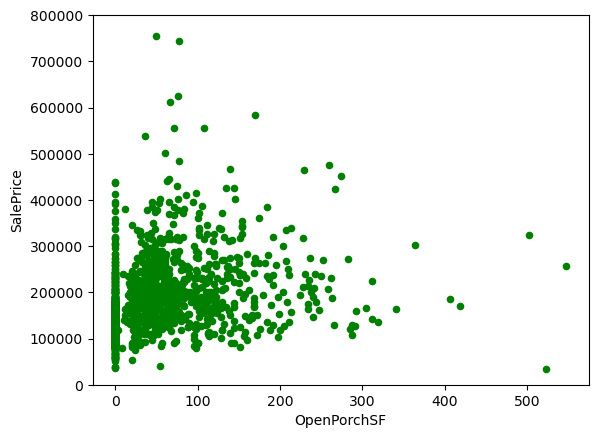

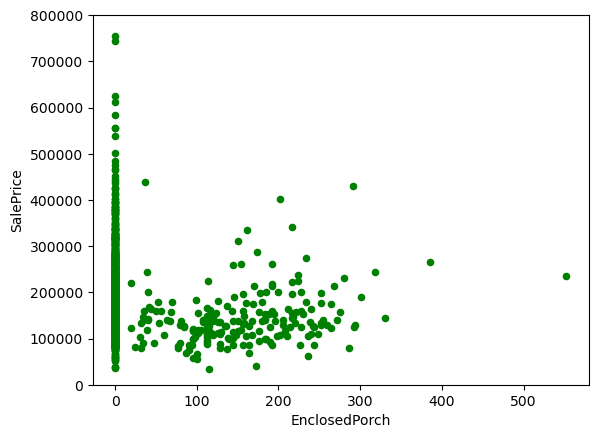

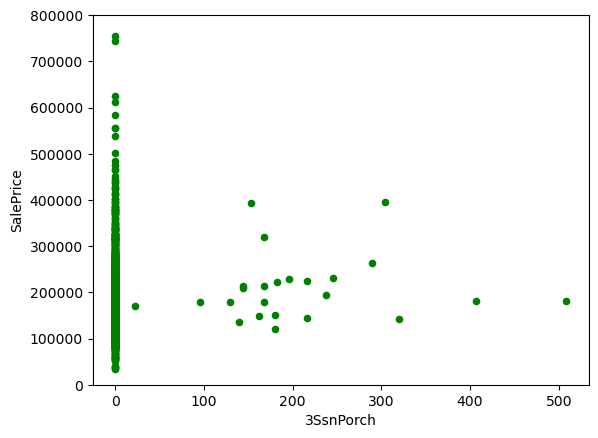

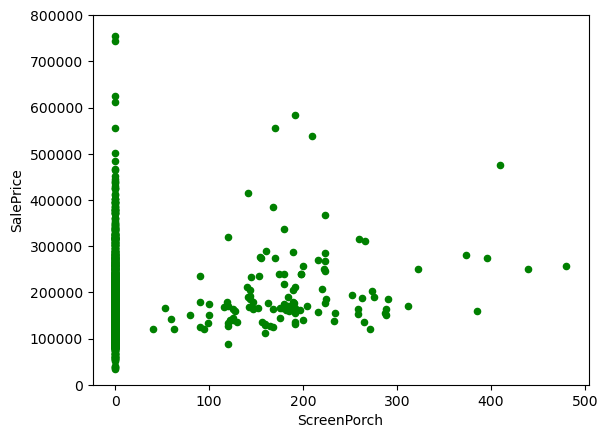

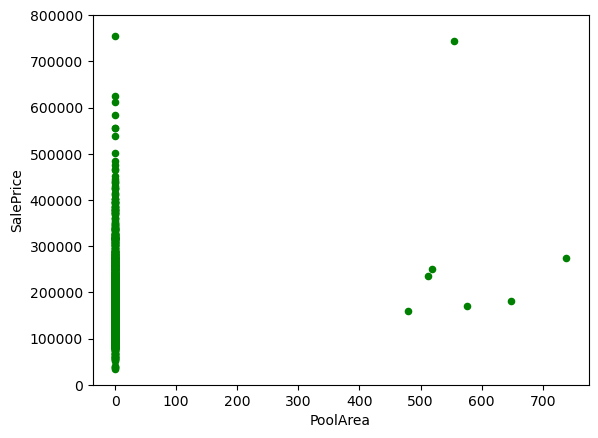

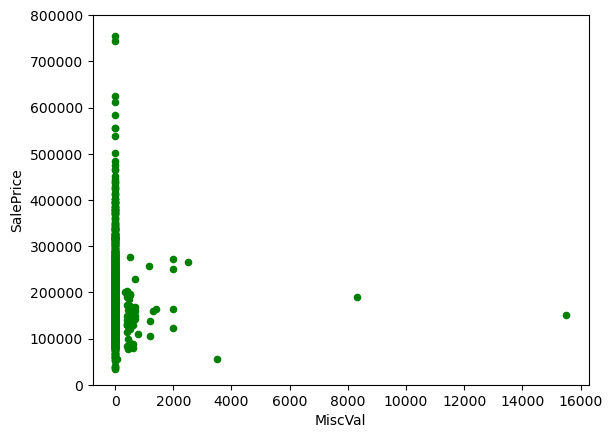

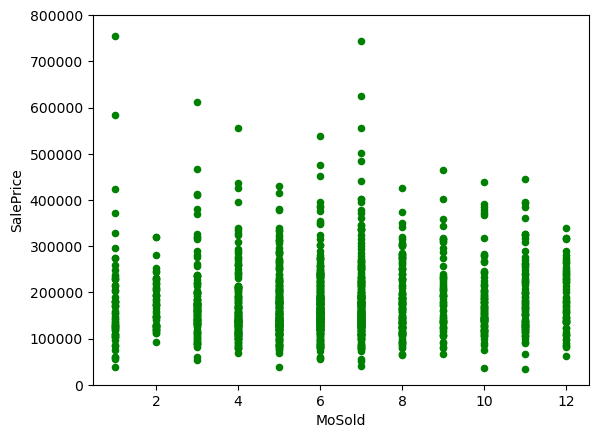

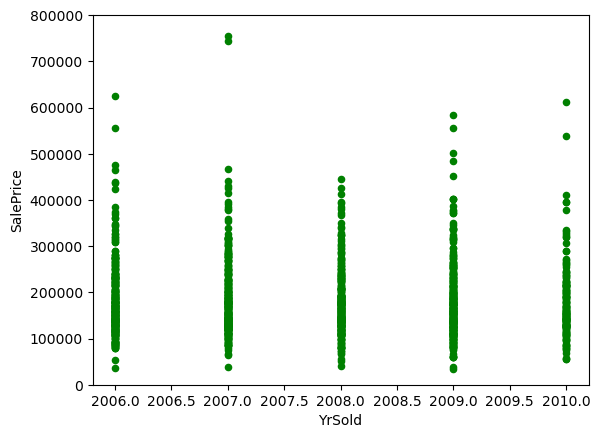

In [9]:
for i in df_numerical:
    dte = pd.concat([df['SalePrice'], df[i]], axis=1)
    dte.plot.scatter(x=i, y='SalePrice', ylim=(0,800000),color='green');

## Data Preprocessing

### Fixing missing values

In [10]:
cols_null = []

for i in new_df.isnull().sum().index:
    if new_df.isnull().sum()[i] > 0:
        cols_null.append(i)
                
print(cols_null)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [11]:
new_df[cols_null].describe(include='all')

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
count,1201.000000,91,1452,1452.000000,1423,1423,1422,1423,1422,1459,770,1379,1379.000000,1379,1379,1379,7,281,54
unique,NaN,2,4,NaN,4,4,4,6,6,5,5,6,NaN,3,5,5,3,4,4
top,NaN,Grvl,None,NaN,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,NaN,Unf,TA,TA,Gd,MnPrv,Shed
freq,NaN,50,864,NaN,649,1311,953,430,1256,1334,380,870,NaN,605,1311,1326,3,157,49
mean,70.049958,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978.506164,NaN,NaN,NaN,NaN,NaN,NaN
std,24.284752,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.689725,NaN,NaN,NaN,NaN,NaN,NaN
min,21.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,59.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,69.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,80.000000,NaN,NaN,166.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print("WIHOUT FILLING",new_df.shape)

WIHOUT FILLING (1460, 79)


In [13]:
for i in [new_df]:
    for j in df_numerical:
        avg_value = i[j].mean()
        i[j] = i[j].fillna(avg_value)

In [14]:
cols_null = []

for i in new_df.isnull().sum().index:
    if new_df.isnull().sum()[i] > 200:
        cols_null.append(i)

print(cols_null)       

for i in [new_df]:
    print(i.shape)
    i.drop(cols_null, axis=1, inplace=True)
    print(i.shape)
    print()
        
print("WITH MEAN",new_df.shape)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
(1460, 79)
(1460, 74)

WITH MEAN (1460, 74)


In [15]:
new_df = new_df.fillna(df.mode().iloc[0])

In [16]:
df_numerical = new_df.select_dtypes(exclude='object').columns
df_categorical = new_df.select_dtypes(include='object').columns

## Feature Scaling

In [17]:
sc = StandardScaler()
for i in [new_df]:
    for j in df_numerical:
        i[j] =i[j].astype('float64')
        i[j] = sc.fit_transform(i[j].values.reshape(-1,1))

## Feature Encoding(OneHotEncoding)

In [18]:
new_df = pd.get_dummies(new_df, drop_first=True)
new_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0,0,0,0,1,0,0,0,1,0
2,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,0,0,0,0,1,0,0,0,1,0
3,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0,0,0,0,1,0,0,0,1,0
4,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0,0,0,0,1,0,0,0,0,0
5,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0,0,0,0,1,0,0,0,1,0


In [19]:
df_numerical = new_df.select_dtypes(exclude='object').columns
df_categorical = new_df.select_dtypes(include='object').columns

In [20]:
new_df.drop(df_categorical, axis = 1, inplace = True)

## Train - Test Split

In [21]:
X = new_df
y = df['SalePrice']

In [22]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0,0,0,0,1,0,0,0,1,0
2,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,0,0,0,0,1,0,0,0,1,0
3,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0,0,0,0,1,0,0,0,1,0
4,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0,0,0,0,1,0,0,0,0,0
5,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,0,0,0,0,1,0,0,0,1,0
1457,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,0,0,0,0,1,0,0,0,1,0
1458,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,0,0,0,0,1,0,0,0,1,0


In [23]:
y

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

## Linear Regression

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predict_value = lr.predict(X_test)
print(mean_absolute_error(y_test, predict_value))
print(mean_squared_error(y_test, predict_value))
print(r2_score(y_test, predict_value))

1511253742067.6401
1.4092019185827595e+26
-2.0203441424276576e+16
